# Описание данных

**SalePrice** - цена продажи недвижимости в долларах. Это целевая переменная, которую вы пытаетесь предсказать.

**MSSubClass**: Класс здания

**MSZoning**: Общая классификация разделения на зоны

**LotFrontage**: Фасад участка в linear feet

**LotArea**: Размер участка в квадратных футах

**Street**: Тип подъездной дороги

**Alley**: Тип доступа в переулок

**LotShape**: Общая форма собственности

**LandContour**: Ровность объекта недвижимости

**Utilities**: Тип доступных утилит

**LotConfig**: Конфигурация лота

**LandSlope**: Уклон собственности

**Neighborhood**: Физические местоположения в пределах города Эймс

**Condition1**: Близость к главной дороге или железной дороге

**Condition2**: Близость к главной дороге или железной дороге (при наличии второго)

**BldgType**: Тип жилья

**HouseStyle**: Стиль жилища

**OverallQual**: Общее качество материала и отделки

**OverallCond**: Общая оценка состояния

**YearBuilt**: Первоначальная дата строительства

**YearRemodAdd**: Дата реконструкции

**RoofStyle**: Тип крыши

**RoofMatl**: Материал крыши

**Exterior1st**: Наружное покрытие дома

**Exterior2nd**: Наружное покрытие дома (если более одного материала)

**MasVnrType**: Тип облицовки кладки

**MasVnrArea**: Площадь облицовки кладки в квадратных футах

**ExterQual**: Качество наружных материалов

**ExterCond**: Настоящее состояние материала на внешней стороне

**Foundation**: Тип фундамента

**BsmtQual**: Высота подвала

**BsmtCond**: Общее состояние подвала

**BsmtExposure**: Стены подвала на уровне улицы или сада

**BsmtFinType1**: Качество отделанной площади подвала

**BsmtFinSF1**: Тип 1 готовые квадратные футы

**BsmtFinType2**: Качество второй готовой площади (при наличии)

**BsmtFinSF2**: Тип 2 готовые квадратные футы

**BsmtUnfSF**: Недостроенные квадратные футы подвальной площади

**TotalBsmtSF**: Общая площадь подвала в квадратных футах

**Heating**: Тип отопления

**HeatingQC**: Качество и состояние отопления

**CentralAir**: Центральное кондиционирование воздуха

**Electrical**: Электрическая система

**1stFlrSF**: Первый этаж квадратных футов

**2ndFlrSF**: Квадратный фут второго этажа

**LowQualFinSF**: Низкое качество отделки квадратных футов (все этажи)

**GrLivArea**: Надземная (наземная) жилая площадь квадратных футов

**BsmtFullBath**: Подвал с ванными комнатами

**BsmtHalfBath**: Полуподвальные ванные комнаты

**FullBath**: Полные ванные комнаты выше класса

**HalfBath**: Половина ванн выше класса

**Bedroom**: Количество спален над цокольным этажом

**Kitchen**: Количество кухонь

**KitchenQual**: Качество кухни

**TotRmsAbvGrd**: Общее количество номеров выше класса (не включает ванные комнаты)

**Functional**: Рейтинг функциональности дома

**Fireplaces**: Количество каминов

**FireplaceQu**: Качество камина

**GarageType**: Расположение гаража

**GarageYrBlt**: Год постройки гаража

**GarageFinish**: Внутренняя отделка гаража

**GarageCars**: Размер гаража в вместимости автомобиля

**GarageArea**: Размер гаража в квадратных футах

**GarageQual**: Качество гаража

**GarageCond**: Состояние гаража

**PavedDrive**: Асфальтированная подъездная дорожка

**WoodDeckSF**: Площадь деревянной палубы в квадратных футах

**OpenPorchSF**: Площадь открытого крыльца в квадратных футах

**EnclosedPorch**: Закрытая площадь крыльца в квадратных футах

**3SsnPorch**: Площадь трехсезонного крыльца в квадратных футах

**ScreenPorch**: Площадь крыльца в квадратных футах

**PoolArea**: Площадь бассейна в квадратных футах

**PoolQC**: Качество бассейна

**Fence**: Качество забора

**MiscFeature**: Разное функция, не включенная в другие категории

**MiscVal**: $Стоимость разных функций

**MoSold**: Месяц продажи

**YrSold**: Год продажи

**SaleType**: Тип продажи

**SaleCondition**: Условия продажи


In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from random import randint, seed

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNetCV, BayesianRidge, LassoLarsIC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics.regression import mean_absolute_error as mae
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


from scipy.stats import norm, boxcox_normmax
import scipy.stats as stats
from scipy.special import boxcox1p


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

!pip install catboost
!pip install xgboost

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import catboost

from hyperopt import hp, fmin, tpe
from hyperopt.pyll import scope


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


     |████████████████████████████████| 67.3MB 42kB/s 


## Загружаем данные

In [2]:
!git clone "https://github.com/alfir-v10/HousePricesAdvancedRegressionTechniques.git"


Cloning into 'HousePricesAdvancedRegressionTechniques'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [3]:
path = '/content/HousePricesAdvancedRegressionTechniques/data'
df_train = pd.read_csv(path+'/train.csv')
df_test = pd.read_csv(path+'/test.csv')
print("df_train shape: ", df_train.shape)
print("df_test shape: ", df_test.shape)

df_train shape:  (1460, 81)
df_test shape:  (1459, 80)


## Посмотрим на наши данные и проанализируем

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Объединим таблицы

In [5]:
df_SalePrice = df_train.SalePrice
df_SalePrice.shape

(1460,)

In [6]:
df_SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [7]:
train = df_train.drop(['SalePrice'], axis=1)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
print("Dataframe shapes:\n \ttest {} \n \ttrain {}".format(df_test.shape, train.shape))

Dataframe shapes:
 	test (1459, 80) 
 	train (1460, 80)


In [10]:
df = pd.concat([train,df_test], keys=['x','y']).drop(['Id'], axis=1)
df

MSSubClass MSZoning  LotFrontage  ...  YrSold SaleType SaleCondition
x 0             60       RL         65.0  ...    2008       WD        Normal
  1             20       RL         80.0  ...    2007       WD        Normal
  2             60       RL         68.0  ...    2008       WD        Normal
  3             70       RL         60.0  ...    2006       WD       Abnorml
  4             60       RL         84.0  ...    2008       WD        Normal
...            ...      ...          ...  ...     ...      ...           ...
y 1454         160       RM         21.0  ...    2006       WD        Normal
  1455         160       RM         21.0  ...    2006       WD       Abnorml
  1456          20       RL        160.0  ...    2006       WD       Abnorml
  1457          85       RL         62.0  ...    2006       WD        Normal
  1458          60       RL         74.0  ...    2006       WD        Normal

[2919 rows x 79 columns]

In [11]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

Обнаружим пропущеные значения


In [12]:
df_null = df.isnull().sum().sort_values(ascending=False)
df_null.head(10)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
dtype: int64

Видим, что значения PoolQC, MiscFeature, Alley, Fence, Fireplace и возможно LotFrontage малоинформативны из-за большого объема пропущенных значений.

Абсолютные значения могут искажать восприятие, поэтому взглянем на процентное соотношение пропущенных значений


In [13]:
df_null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
df_null_percent.head(15)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageCond      0.054471
GarageQual      0.054471
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
dtype: float64

Теперь мы лучше видим, что стоит удалить столбцы со значениями PoolQC, MiscFeature, Alley, Fence, Fireplace. Сделаем это.

In [14]:
df_drop_null = df.drop(df_null_percent.index[df_null_percent > 0.05], axis=1).copy()
df_drop_null

MSSubClass MSZoning  LotArea  ... YrSold SaleType SaleCondition
x 0             60       RL     8450  ...   2008       WD        Normal
  1             20       RL     9600  ...   2007       WD        Normal
  2             60       RL    11250  ...   2008       WD        Normal
  3             70       RL     9550  ...   2006       WD       Abnorml
  4             60       RL    14260  ...   2008       WD        Normal
...            ...      ...      ...  ...    ...      ...           ...
y 1454         160       RM     1936  ...   2006       WD        Normal
  1455         160       RM     1894  ...   2006       WD       Abnorml
  1456          20       RL    20000  ...   2006       WD       Abnorml
  1457          85       RL    10441  ...   2006       WD        Normal
  1458          60       RL     9627  ...   2006       WD        Normal

[2919 rows x 68 columns]

Представим месяц и год, как категориальные признаки

In [15]:
df_drop_null["MoSold"] = df_drop_null["MoSold"].astype(str)
df_drop_null["YrSold"] = df_drop_null["YrSold"].astype(str)
df_drop_null["YearBuilt"] = df_drop_null["YearBuilt"].astype(str)

In [16]:
df_drop_null.isnull().sum().sort_values(ascending=False)

BsmtCond        82
BsmtExposure    82
BsmtQual        81
BsmtFinType2    80
BsmtFinType1    79
                ..
2ndFlrSF         0
1stFlrSF         0
CentralAir       0
HeatingQC        0
MSSubClass       0
Length: 68, dtype: int64

Определим тип данных: числовой или категориальный

In [17]:
numerical = df_drop_null._get_numeric_data().columns
numerical

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [18]:
categorical = set(df_drop_null.columns) - set(numerical)
categorical

{'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MoSold',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities',
 'YearBuilt',
 'YrSold'}

Теперь остается провести интерполяцию, заменив пустые значения. [Pandas Tricks for Imputing Missing Data](https://towardsdatascience.com/pandas-tricks-for-imputing-missing-data-63da3d14c0d6)

In [19]:
for num in numerical:
  df_drop_null[num].fillna(df_drop_null[num].mean(), inplace=True)

In [20]:
for cat in categorical:
  df_drop_null[cat].fillna(df_drop_null[cat].mode()[0], inplace=True)

In [21]:
df_drop_null.dtypes

MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
LotShape         object
                  ...  
MiscVal           int64
MoSold           object
YrSold           object
SaleType         object
SaleCondition    object
Length: 68, dtype: object

In [22]:
cols_to_drop = []
for cat in categorical:
  val_percent = (df_drop_null[cat].value_counts()/df_drop_null[cat].value_counts().sum()).round(2)
  if val_percent.max() > 0.8:
     cols_to_drop.append(val_percent.name)
print("Columns to drop: ", cols_to_drop, len(cols_to_drop))

Columns to drop:  ['Street', 'BsmtFinType2', 'Condition2', 'SaleCondition', 'Functional', 'BldgType', 'PavedDrive', 'Condition1', 'Electrical', 'RoofMatl', 'LandContour', 'BsmtCond', 'CentralAir', 'Heating', 'LandSlope', 'SaleType', 'Utilities', 'ExterCond'] 18


In [23]:
df_new = df_drop_null.drop(labels=cols_to_drop, axis=1).copy()
df_new.shape

(2919, 50)

In [24]:
type(df_SalePrice.to_frame)

method

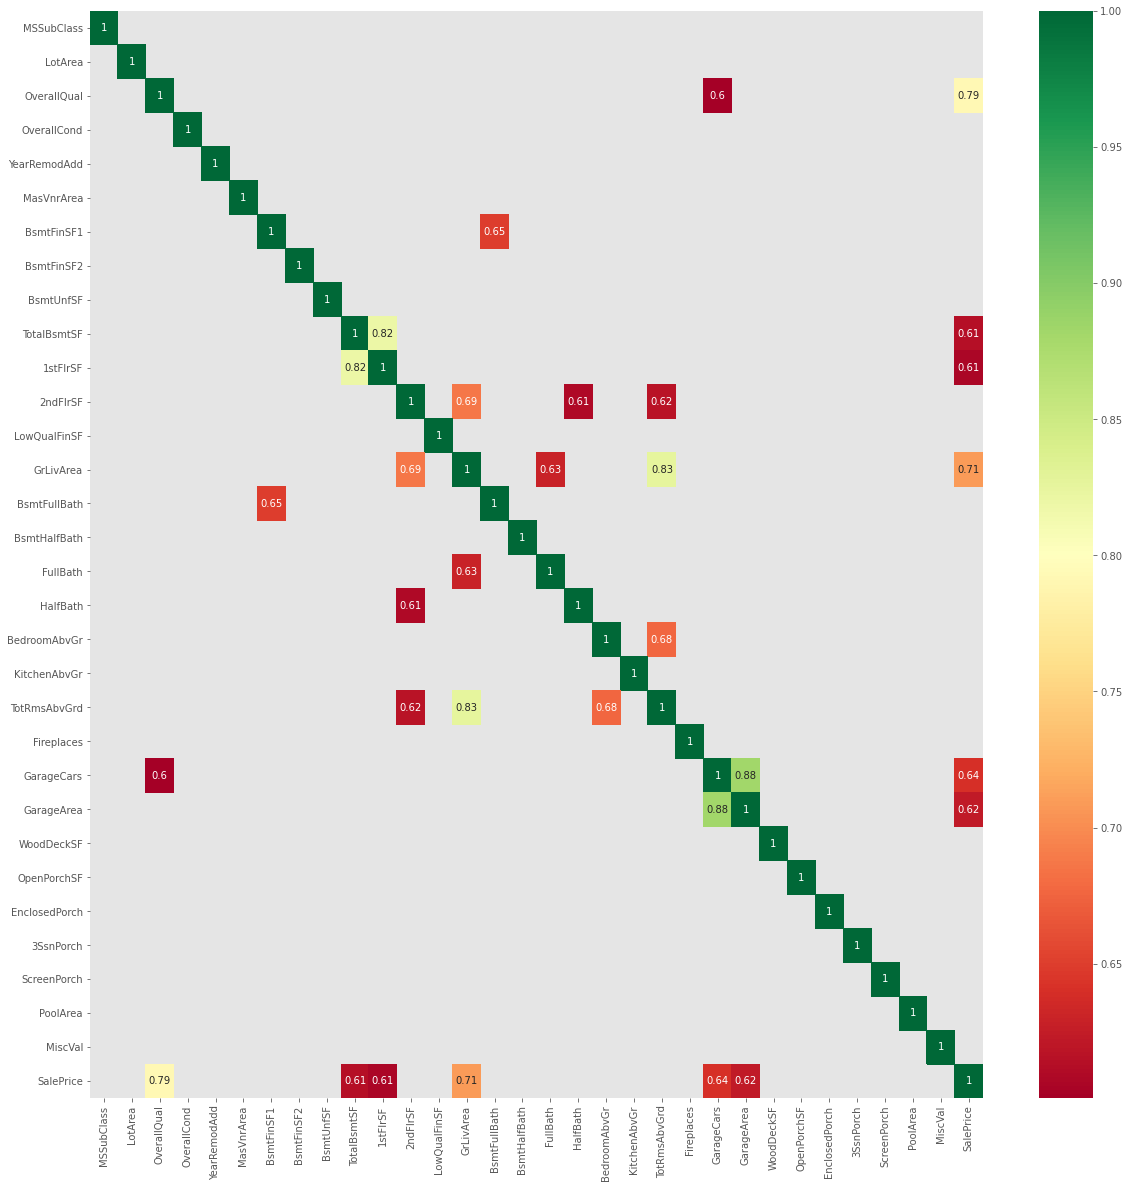

In [25]:
df_withPrice = df_new.loc['x'].copy()
df_withPrice['SalePrice'] = df_SalePrice.values
plt.figure(figsize=(20, 20))
corr = df_withPrice[df_withPrice.columns].corr()
sns.heatmap(corr[corr > 0.6], annot=True, cmap="RdYlGn")

Посмотрим отчего зависит стоимость жилья. В принципе по heatmap уже видно, что наибольшую корреляцию со стоимостью дома имеют OverallQual(Общее качество материала и отделки) и GrLivArea(надземная (наземная) жилая площадь в квадратных футах)

Удалим один из признаков среди тех, которые сильно коррелируют друг с другом. Высокая корреляция между данными является признаком избыточной информации. Видим признаки, которые коррелирует друг с другом. TotalBsmtSF и 1stFlrSF(площадь подвала соответсвует площади первого этажа), GarageCars и GarageArea (площадь горожа и кол-во вмещаемых машин), TotRmsAbvGrd и GrLivArea. То есть часть этих признаков можно на выбор отбросить, GrLivArea и 2ndFlrSF

In [26]:
corr_to_drop = ['1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'GarageCars']
df_new.drop(corr_to_drop, axis=1, inplace=True)

Так же можно удалить признаки у которых корреляция с целевой переменной низкая.

In [27]:
cols_to_drop = corr[abs(corr.SalePrice[:]) < 0.1].SalePrice
print(set(cols_to_drop.keys()).intersection(corr_to_drop))
cols_to_drop

set()


MSSubClass     -0.084284
OverallCond    -0.077856
BsmtFinSF2     -0.011378
LowQualFinSF   -0.025606
BsmtHalfBath   -0.016844
3SsnPorch       0.044584
PoolArea        0.092404
MiscVal        -0.021190
Name: SalePrice, dtype: float64

In [28]:
df_new.drop(cols_to_drop.keys(), axis=1, inplace=True)

In [29]:
df_new

MSZoning  LotArea LotShape  ... ScreenPorch MoSold YrSold
x 0          RL     8450      Reg  ...           0      2   2008
  1          RL     9600      Reg  ...           0      5   2007
  2          RL    11250      IR1  ...           0      9   2008
  3          RL     9550      IR1  ...           0      2   2006
  4          RL    14260      IR1  ...           0     12   2008
...         ...      ...      ...  ...         ...    ...    ...
y 1454       RM     1936      Reg  ...           0      6   2006
  1455       RM     1894      Reg  ...           0      4   2006
  1456       RL    20000      Reg  ...           0      9   2006
  1457       RL    10441      Reg  ...           0      7   2006
  1458       RL     9627      Reg  ...           0     11   2006

[2919 rows x 38 columns]

In [30]:
df_new.columns

Index(['MSZoning', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

# Scaling and Encoding

In [31]:
df_new_feat = df_new.copy()

In [32]:
df_new_feat.dtypes

MSZoning          object
LotArea            int64
LotShape          object
LotConfig         object
Neighborhood      object
HouseStyle        object
OverallQual        int64
YearBuilt         object
YearRemodAdd       int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
Foundation        object
BsmtQual          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
HeatingQC         object
GrLivArea          int64
BsmtFullBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
Fireplaces         int64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
ScreenPorch        int64
MoSold            object
YrSold            object
dtype: object

In [33]:
numerical = df_new_feat.select_dtypes(exclude=['object']).columns.values
categorical = df_new_feat.select_dtypes(include=['object']).columns.values

In [34]:
numerical

array(['LotArea', 'OverallQual', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch'], dtype=object)

In [35]:
categorical

array(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'MoSold', 'YrSold'], dtype=object)

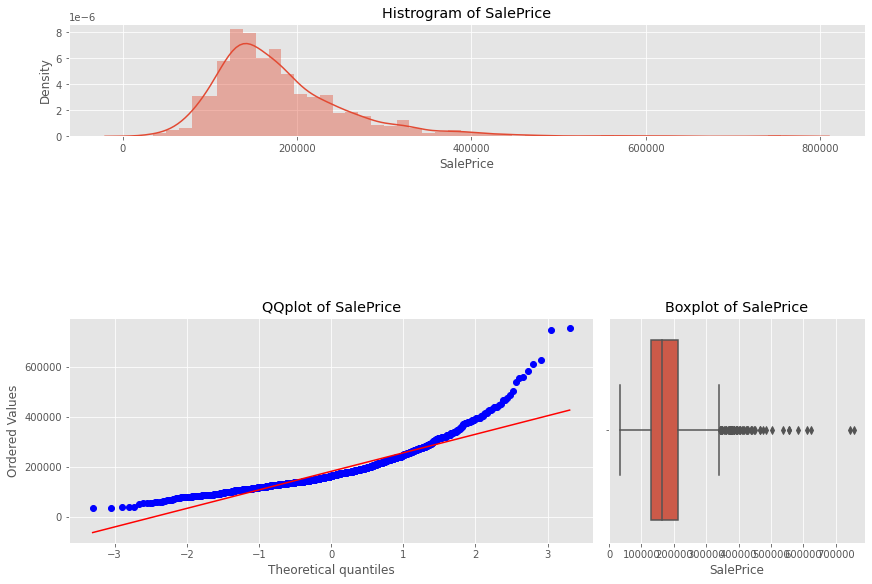

In [36]:
fig = plt.figure(constrained_layout=True, figsize=(12,8))
grid = gridspec.GridSpec(ncols=3, nrows=4, figure=fig)

ax1 = fig.add_subplot(grid[0,:])
sns.distplot(df_SalePrice,ax=ax1)
ax1.set_title("Histrogram of SalePrice")

ax2 = fig.add_subplot(grid[2:,:2])
stats.probplot(df_SalePrice,plot=ax2)
ax2.set_title("QQplot of SalePrice")

ax3 = fig.add_subplot(grid[2:,2])
sns.boxplot(df_SalePrice,ax=ax3,orient="v")
ax3.set_title("Boxplot of SalePrice")
plt.show()

[Skew and Kurtosis: 2 Important Statistics terms you need to know in Data Science](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa)

In [37]:
print("Kurtosis: {}".format(df_SalePrice.kurt()))
print("Skewness: {}".format(df_SalePrice.skew()))

Kurtosis: 6.536281860064529
Skewness: 1.8828757597682129


По графикам видим перекос распределения и длинный хвост, который говорит нам о большом количестве выбросов.

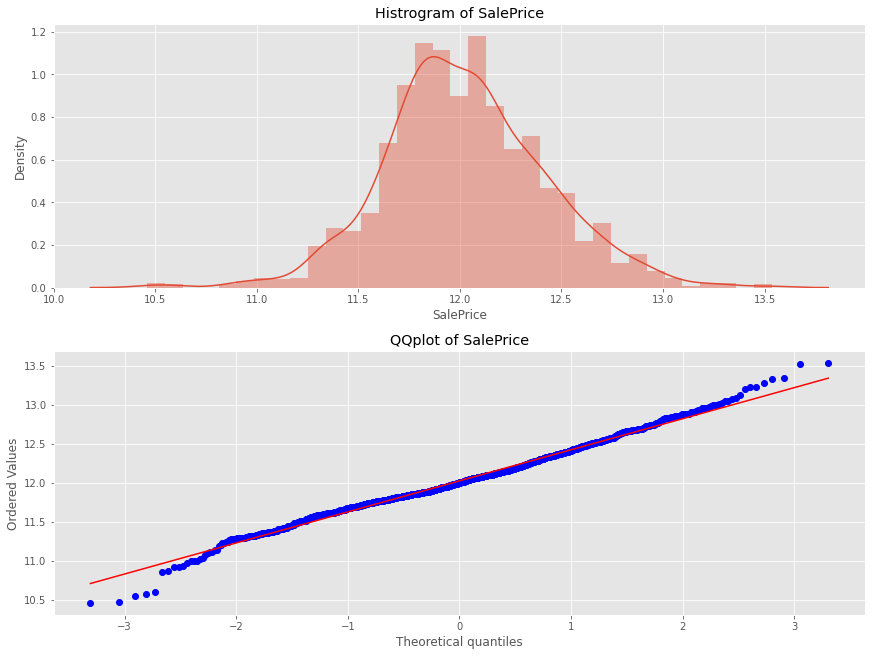

In [38]:
df_SalePrice = np.log1p(df_SalePrice)
fig,(ax1,ax2) = plt.subplots(2,1,constrained_layout=True,figsize=(12,9))
sns.distplot(df_SalePrice,ax=ax1)
ax1.set_title("Histrogram of SalePrice")
stats.probplot(df_SalePrice,plot=ax2)
ax2.set_title("QQplot of SalePrice")
plt.show()

In [39]:
print("Kurtosis: {}".format(df_SalePrice.kurt()))
print("Skewness: {}".format(df_SalePrice.skew()))

Kurtosis: 0.809519155707878
Skewness: 0.12134661989685333


Проверим Kurtosis и Skewness на числовых признаках

In [40]:
skewness = df_new_feat[numerical].skew().sort_values(ascending=False)
kurtosis = df_new_feat[numerical].kurt().sort_values(ascending=False)
df_norm = pd.concat([skewness,kurtosis],axis=1,keys=["Skewness","Kurtosis"])
df_norm

,Skewness,Kurtosis
LotArea,12.829025,264.952310
KitchenAbvGr,4.304467,19.777937
EnclosedPorch,4.005950,28.377909
ScreenPorch,3.948723,17.776704
MasVnrArea,2.612892,9.351548
OpenPorchSF,2.536417,10.937353
WoodDeckSF,1.843380,6.741550
BsmtFinSF1,1.425966,6.908223
GrLivArea,1.270010,4.121604
TotalBsmtSF,1.163082,9.155258


In [41]:
high_skew = skewness[abs(skewness) > 0.5].sort_values(ascending=False)
high_skew.keys()

Index(['LotArea', 'KitchenAbvGr', 'EnclosedPorch', 'ScreenPorch', 'MasVnrArea',
       'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF',
       'BsmtUnfSF', 'Fireplaces', 'HalfBath', 'BsmtFullBath'],
      dtype='object')

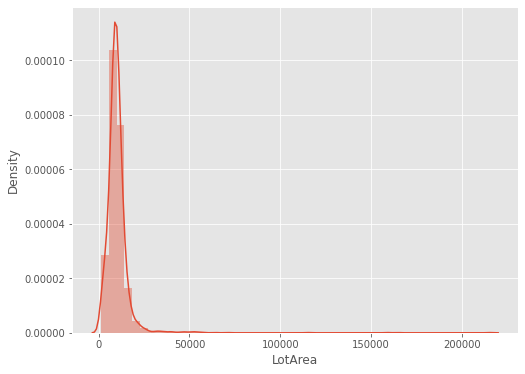

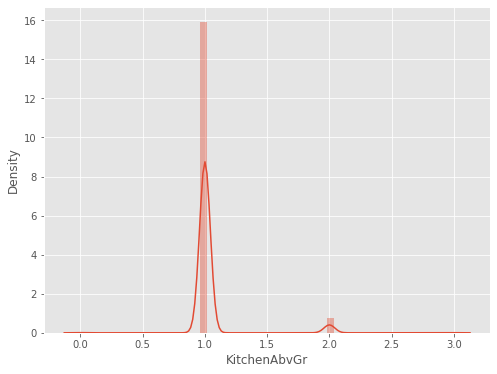

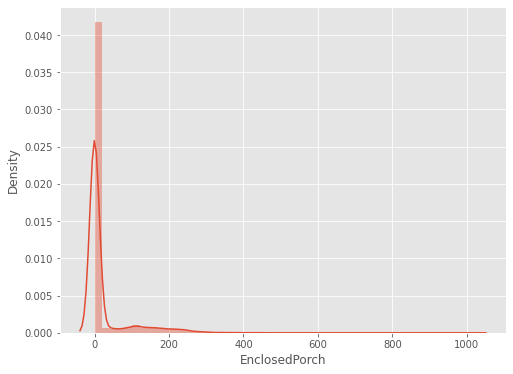

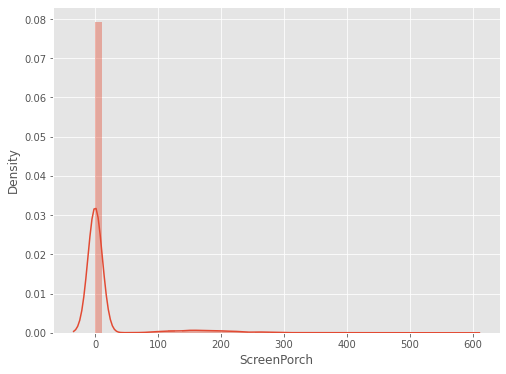

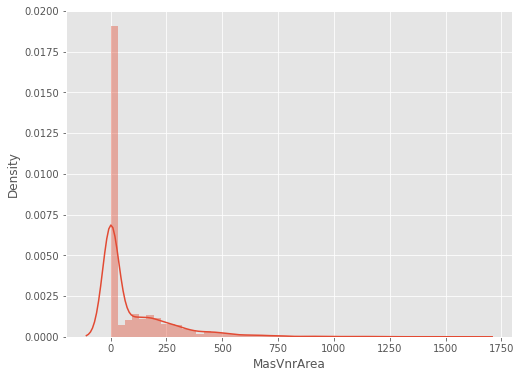

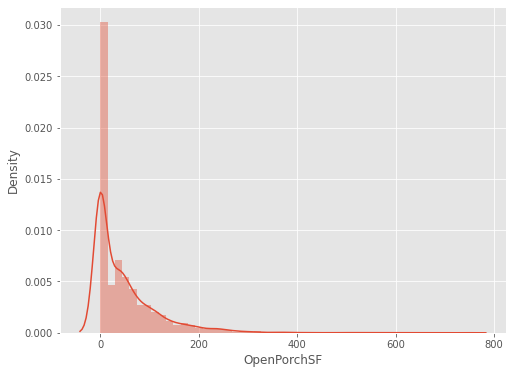

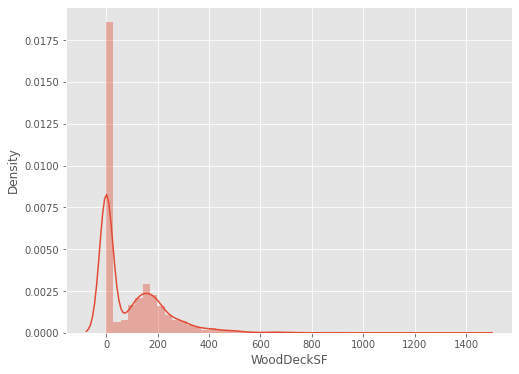

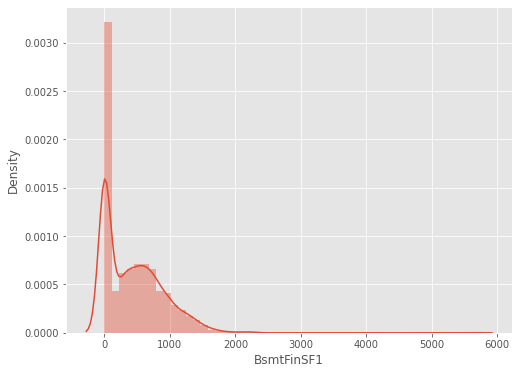

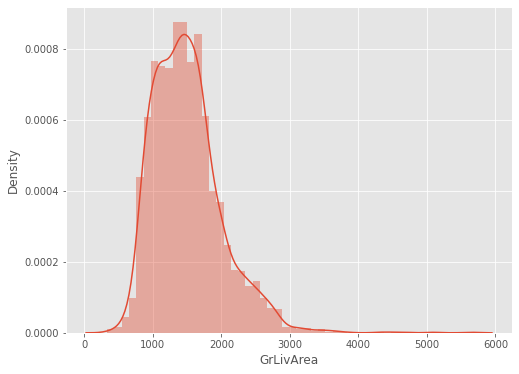

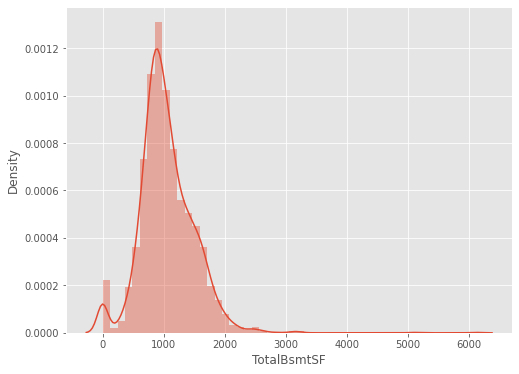

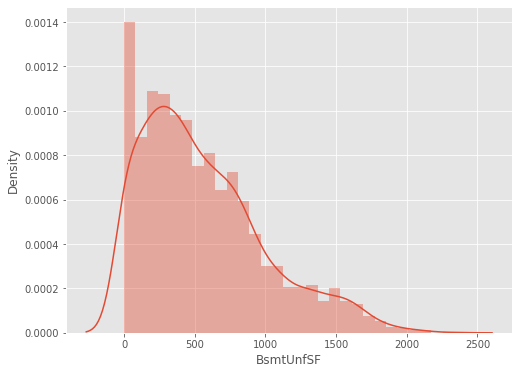

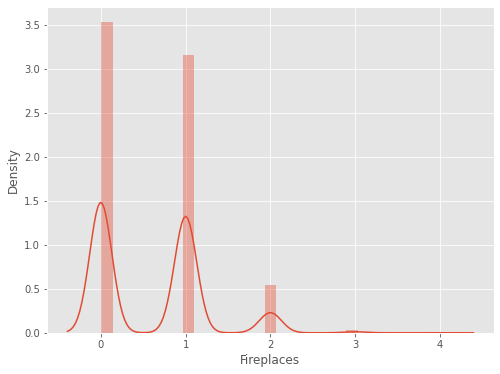

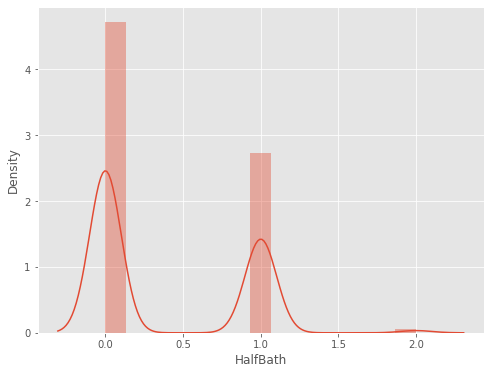

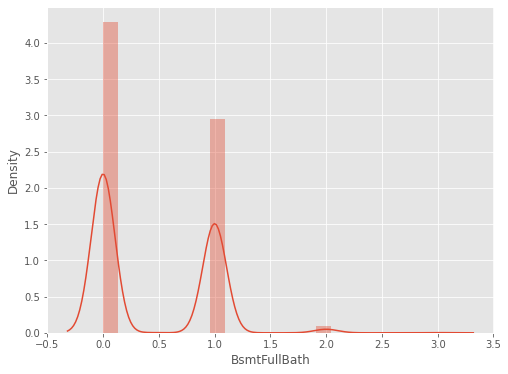

In [42]:
for high in high_skew.keys():
  plt.figure(figsize=(8,6))
  sns.distplot(df_new_feat[high])
  plt.show()

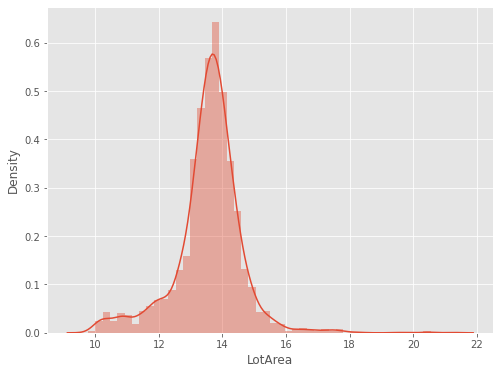

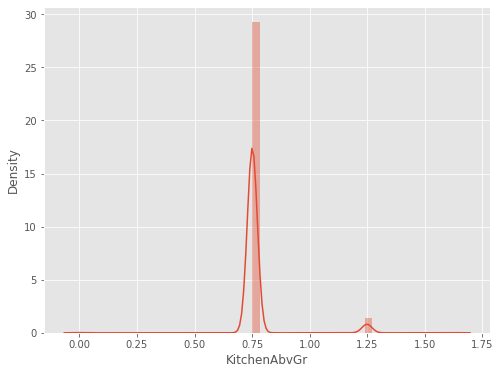

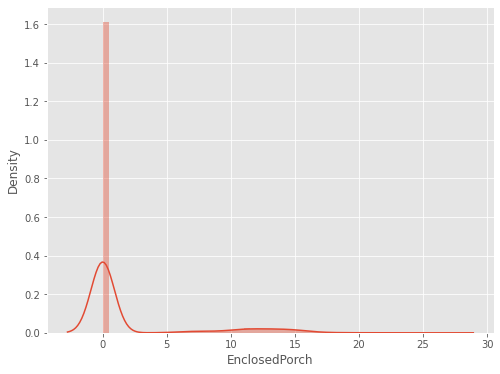

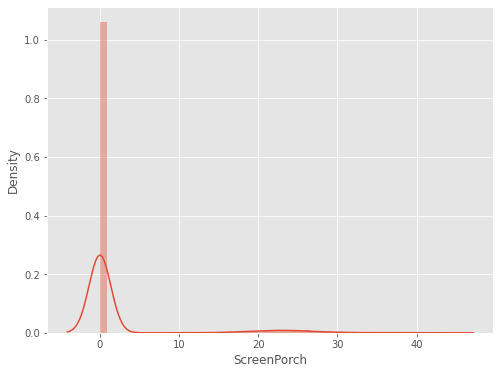

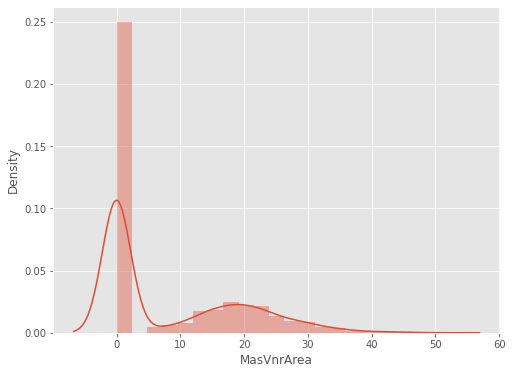

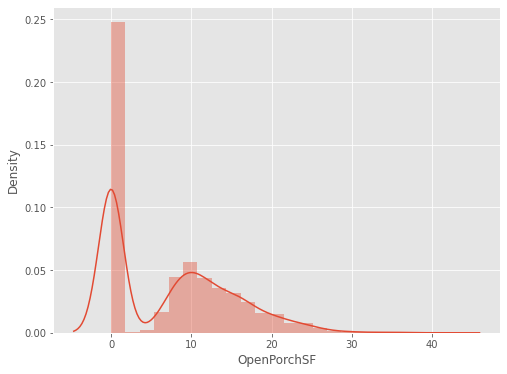

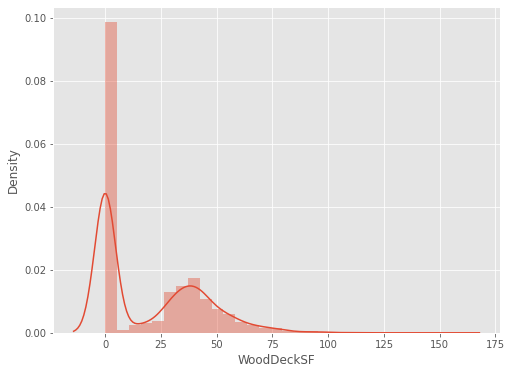

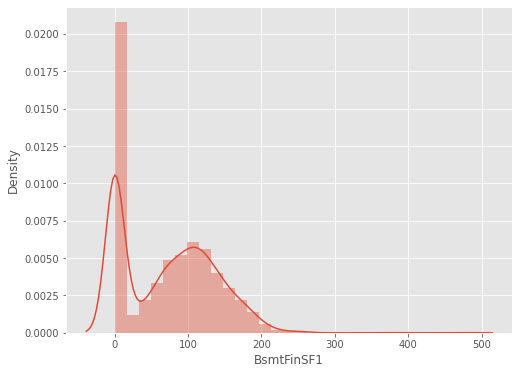

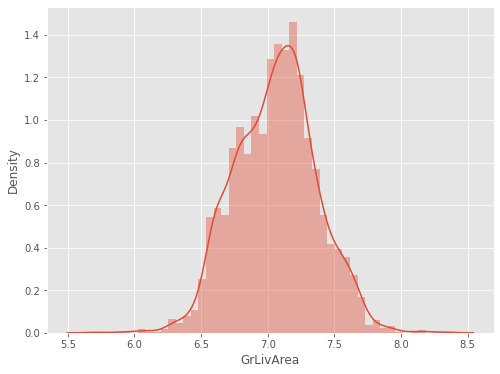

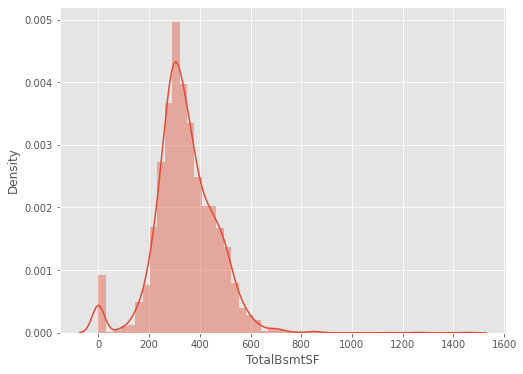

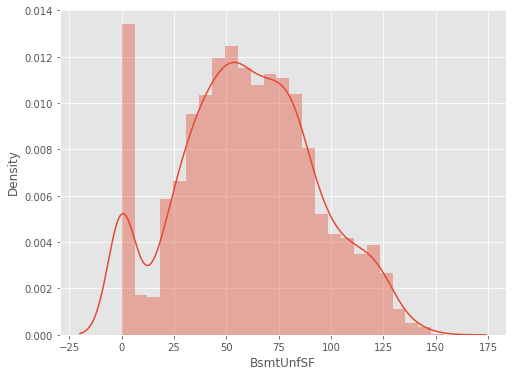

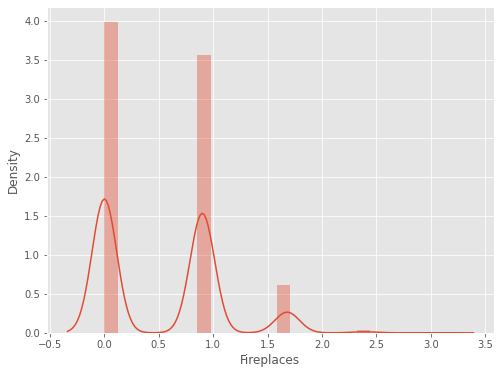

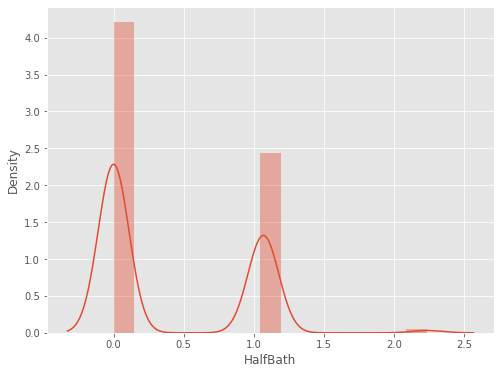

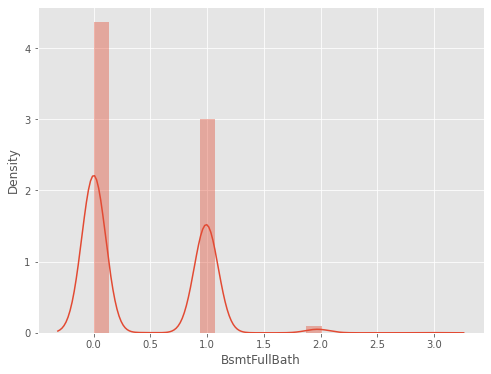

In [44]:
for feat in high_skew.index:
    df_new_feat[feat] = boxcox1p(df_new_feat[feat], boxcox_normmax(df_new_feat[feat] + 1))
for high in high_skew.keys():
  plt.figure(figsize=(8,6))
  sns.distplot(df_new_feat[high])
  plt.show()

### Добавив новые признаки

In [45]:
df_new_feat.columns

Index(['MSZoning', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [46]:
presence = lambda x: 1 if x > 0 else 0

In [47]:
df_new_feat["HasGarage"] = df_new_feat["GarageArea"].transform(presence)
df_new_feat["HasFirePlace"] = df_new_feat["Fireplaces"].transform(presence)

In [48]:
df_new_feat["TotalPorchSF"] = df_new_feat["WoodDeckSF"] + df_new_feat["OpenPorchSF"] + df_new_feat["EnclosedPorch"] + df_new_feat["ScreenPorch"] 
df_new_feat["TotalBath"] = df_new_feat["BsmtFullBath"] + df_new_feat["BsmtFullBath"]*0.5 + df_new_feat["FullBath"] + df_new_feat["HalfBath"]*0.5

In [50]:
df_new_feat

MSZoning    LotArea LotShape  ... HasFirePlace TotalPorchSF TotalBath
x 0          RL  13.424520      Reg  ...            0    12.009558  4.022011
  1          RL  13.694527      Reg  ...            1    56.339208  2.000000
  2          RL  14.034133      IR1  ...            1     9.849185  4.022011
  3          RL  13.683421      IR1  ...            1    24.933771  2.487335
  4          RL  14.550142      IR1  ...            1    56.531530  4.022011
...         ...        ...      ...  ...          ...          ...       ...
y 1454       RM  10.503897      Reg  ...            0     0.000000  1.534676
  1455       RM  10.463055      Reg  ...            0     7.235575  1.534676
  1456       RL  15.304040      Reg  ...            1    76.001323  2.487335
  1457       RL  13.873786      Reg  ...            0    32.303751  1.000000
  1458       RL  13.700502      Reg  ...            1    52.643121  2.534676

[2919 rows x 42 columns]

Преобразует категориальные данные в числовые

In [51]:
df_new_feat = pd.get_dummies(df_new_feat)
df_new_feat

LotArea  OverallQual  ...  YrSold_2009  YrSold_2010
x 0     13.424520            7  ...            0            0
  1     13.694527            6  ...            0            0
  2     14.034133            7  ...            0            0
  3     13.683421            7  ...            0            0
  4     14.550142            8  ...            0            0
...           ...          ...  ...          ...          ...
y 1454  10.503897            4  ...            0            0
  1455  10.463055            4  ...            0            0
  1456  15.304040            5  ...            0            0
  1457  13.873786            5  ...            0            0
  1458  13.700502            7  ...            0            0

[2919 rows x 279 columns]

Разобьем снова данные на тренировочные и тестовые

In [52]:
train_data = df_new_feat.loc['x']
test_data = df_new_feat.loc['y']

In [54]:
X_train, X_test, y_train, y_test =  train_test_split(train_data, df_SalePrice ,test_size=0.20,random_state=2021)
print("Shapes of data: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes of data:  (1168, 279) (292, 279) (1168,) (292,)


In [55]:
pipeline_models = []
seed = 2021
models = [Ridge(tol=10,random_state=seed),
          Lasso(tol=1,random_state=seed),
          RandomForestRegressor(random_state=seed),
          ExtraTreesRegressor(random_state=seed),
          GradientBoostingRegressor(),
          DecisionTreeRegressor(),
          KNeighborsRegressor(),
          CatBoostRegressor(),
          XGBRegressor()]
model_names = ["Ridge","Lasso","RFR","ETR","GBoost_Reg","DT_Reg","KNN_Reg","CatBoost", 'XGBR']
for name, model in zip(model_names,models):
    pipeline = ("Scaled_"+ name,
                Pipeline([("Scaler",StandardScaler()),
                          (name,model)
                         ]))
    pipeline_models.append(pipeline)

In [56]:
evaluate = pd.DataFrame(columns=["model","cv","std"])
for name,model in pipeline_models:
    kfold = KFold(n_splits=7,shuffle=True,random_state=42)
    cv = cross_val_score(model, X_train, y_train, cv=kfold, n_jobs=-1, scoring="r2")
    
    row = evaluate.shape[0]
    evaluate.loc[row,"model"] = name
    evaluate.loc[row,"cv"] = round(cv.mean(),3)
    evaluate.loc[row,"std"] = "+/- {}".format(round(cv.std(),4))
    
    evaluate = evaluate.sort_values("cv",ascending=False)

[Text(0, 0, 'Scaled_CatBoost'),
 Text(0, 0, 'Scaled_XGBR'),
 Text(0, 0, 'Scaled_GBoost_Reg'),
 Text(0, 0, 'Scaled_ETR'),
 Text(0, 0, 'Scaled_RFR'),
 Text(0, 0, 'Scaled_Ridge'),
 Text(0, 0, 'Scaled_DT_Reg'),
 Text(0, 0, 'Scaled_KNN_Reg'),
 Text(0, 0, 'Scaled_Lasso')]

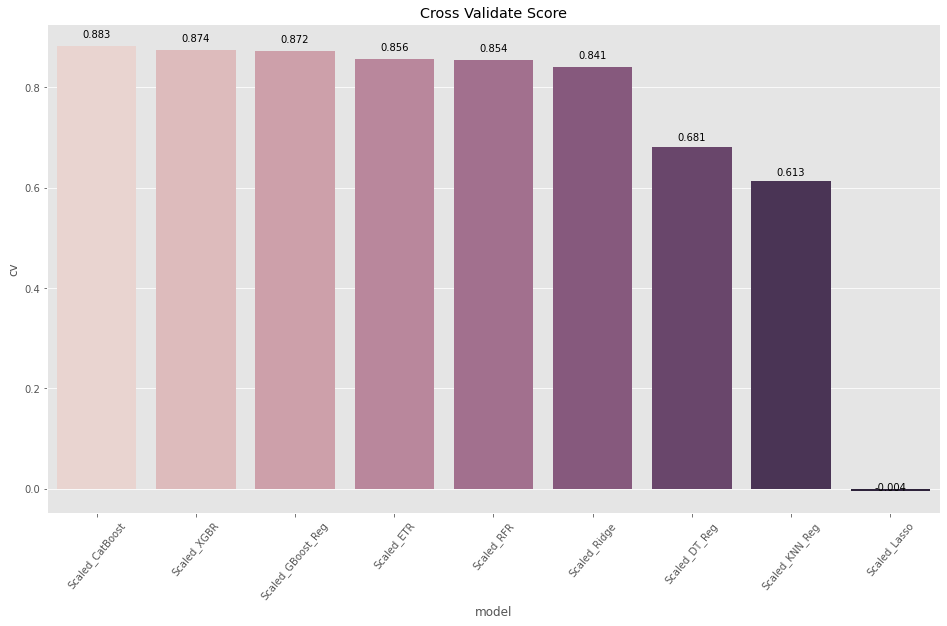

In [57]:
fig, ax = plt.subplots(1,1,sharey=False,figsize=(16,9))
bar = sns.barplot(evaluate["model"], evaluate["cv"],ax=ax,palette = sns.cubehelix_palette(evaluate.shape[0]))
for rec in bar.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width()/2, height*1.02,height,ha="center")
ax.set_title("Cross Validate Score")
ax.set_xticklabels(evaluate["model"].to_list(),rotation =50)

[Tuning tuning scikit-learn parameters using optimization](https://gist.github.com/JCardenasRdz/6c5e9c2c8fd21a83e20c21e446cfea2c)

In [62]:
# hyperopt object for 
scope.define(GradientBoostingRegressor)    

def train_GradientBoostingRegressor(Xdata, Ydata, loss='ls' ,alpha = 0.50, cv = 2, n_steps = 10, random_state =2021):
    """
    Trains a Gradient Boosting Regressor using bayesian optimization 

    Parameters
    ----------
    Xdata: numpy array of size KxN and composed of floating and/or integers
    Ydata: numpy array of size K (1D array) of floating
    loss: loss function to be optimized.
    alpha: quantile for the quantile and hubber loss; floating < 1.0 and > 0.0
    CV: K-fold cross-validation size for the training procedure
    n_steps: Number of times the `hyperopt` mimizer will run to find the optimal parameters
    
    Returns
    -------
    Regressor : A sckiki-learn obkect with the trained Gradient Boosting Regressor
    
    """
    #split data
    np.random.seed(2021)
    X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=.33, random_state = 2021)
    
    # create and objective function
    def objective_function_regression(estimator):
        mae_array = cross_val_score( estimator, X_train, y_train, cv= cv, n_jobs=-1, 
                                    scoring = make_scorer(mae) )
        return mae_array.mean()


    # search space
    n_estimators     = hp.randint('n_estimators', 1000) 
    learning_rate    = hp.loguniform('learning_rate', -3, 1)
    max_depth        = hp.randint('max_depth', 10)
    max_features     = hp.randint('max_features', X_train.shape[1])
    min_samples_leaf = hp.randint('min_samples_leaf', 10)
    #criterion        = hp.choice('criterion', ['friedman_mse'])
                                       
    # model / estimator to be optimized
    est0 = (0.1, scope.GradientBoostingRegressor( n_estimators  = n_estimators + 1,
                                            learning_rate = learning_rate,
                                            max_depth = max_depth + 1,
                                            max_features = max_features + 1,
                                            min_samples_leaf = min_samples_leaf + 1,
                                            random_state= random_state) 
        )

    # search space
    search_space_regression = hp.pchoice('estimator', [est0])
    
    #print('--'*20)
    #print('Finding optimal parameters')
    # perform the optimization
    best = fmin(
    fn= objective_function_regression,
    space= search_space_regression,
    algo = tpe.suggest, # This is the optimization algorithm hyperopt uses, a tree of parzen estimators
    max_evals = n_steps,
    verbose = 0  # The number of iterations
         )
    
    # Allocate optimized parameters and apply to test data set
    Regressor = GradientBoostingRegressor( learning_rate = best['learning_rate'],
                          max_depth = best['max_depth'],
                          max_features = best['max_features'],
                          min_samples_leaf = best['min_samples_leaf'],
                          n_estimators = best['n_estimators'],
                          random_state = random_state
                                       )
    # fit
    Regressor.fit(X_train,y_train)
    
    #evaluate
    yhat = Regressor.predict(X_test) ;
    error_pct = np.round( np.median(np.abs(yhat - y_test)), 2)
    #print('--'*20)
    
    print(  
        "{} {}".format('The Median Abs. Error (%) for the test set is :', error_pct) 
          )
    
    return Regressor, y_test, yhat

In [63]:
train_GradientBoostingRegressor(train_data, df_SalePrice, n_steps=20)

100%|██████████| 20/20 [00:16<00:00,  1.20it/s, best loss: 0.1008995586582355]
The Median Abs. Error (%) for the test set is : 0.08


(GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.11632381027207024,
                           loss='ls', max_depth=1, max_features=45,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=207, n_iter_no_change=None,
                           presort='deprecated', random_state=2021,
                           subsample=1.0, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False), 1380    10.976799
 520     11.573559
 1175    12.560248
 351     12.154785
 1335    12.031130
           ...    
 36      11.884496
 858     11.931642
 833     12.025755
 259     11.482477
 511     12.219315
 Name: SalePrice, Length: 482, dtype: float64, array([11.4446789 , 11.46984

In [69]:
model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.11632381027207024,
                           loss='ls', max_depth=1, max_features=45,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=207, n_iter_no_change=None,
                           presort='deprecated', random_state=2021,
                           subsample=1.0, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)
model.fit(X_train, y_train)
y_predictGB = model.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_predictGB))
rmse

0.13744934043972853

In [70]:
df_sample = pd.read_csv('/content/HousePricesAdvancedRegressionTechniques/data/sample_submission.csv')

In [71]:
y_sample = model.predict(test_data)
rmse = math.sqrt(mean_squared_error(df_sample.SalePrice, np.expm1(y_sample)))
rmse

70080.12172561196

In [74]:
submission_results = pd.read_csv("/content/HousePricesAdvancedRegressionTechniques/data/sample_submission.csv")
submission_results.iloc[:,1] = np.round(np.expm1(model.predict(test_data)),5)
submission_results.to_csv('GradientBoostingRegressor_results', index=False)

# CAT BOOST

In [75]:
catb_model = CatBoostRegressor(verbose=False).fit(X_train, y_train)
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
catb_params = {"iterations": [250,100,500],
               "learning_rate":[0.03,0.01,0.3]
               }
catb_model = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb_model,
                             catb_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.0min finished


0:	learn: 0.3955265	total: 4.48ms	remaining: 2.23s
1:	learn: 0.3885474	total: 8.8ms	remaining: 2.19s
2:	learn: 0.3809705	total: 12.6ms	remaining: 2.09s
3:	learn: 0.3736986	total: 16.5ms	remaining: 2.04s
4:	learn: 0.3670406	total: 20.2ms	remaining: 2s
5:	learn: 0.3608981	total: 24.2ms	remaining: 1.99s
6:	learn: 0.3543776	total: 28ms	remaining: 1.97s
7:	learn: 0.3481238	total: 31.9ms	remaining: 1.96s
8:	learn: 0.3423930	total: 35.7ms	remaining: 1.95s
9:	learn: 0.3361357	total: 39.8ms	remaining: 1.95s
10:	learn: 0.3302666	total: 43.8ms	remaining: 1.95s
11:	learn: 0.3249752	total: 48ms	remaining: 1.95s
12:	learn: 0.3196828	total: 52.1ms	remaining: 1.95s
13:	learn: 0.3142801	total: 55.9ms	remaining: 1.94s
14:	learn: 0.3086776	total: 59.7ms	remaining: 1.93s
15:	learn: 0.3036417	total: 63.7ms	remaining: 1.93s
16:	learn: 0.2985173	total: 67.5ms	remaining: 1.92s
17:	learn: 0.2933606	total: 71.6ms	remaining: 1.92s
18:	learn: 0.2886234	total: 74.3ms	remaining: 1.88s
19:	learn: 0.2840738	total: 78

In [76]:
catb_tuned = CatBoostRegressor(**catb_cv_model.best_params_).fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
rmse

0:	learn: 0.3955265	total: 4.46ms	remaining: 2.23s
1:	learn: 0.3885474	total: 8.65ms	remaining: 2.15s
2:	learn: 0.3809705	total: 12.9ms	remaining: 2.13s
3:	learn: 0.3736986	total: 16.9ms	remaining: 2.1s
4:	learn: 0.3670406	total: 21.7ms	remaining: 2.15s
5:	learn: 0.3608981	total: 25.8ms	remaining: 2.12s
6:	learn: 0.3543776	total: 29.7ms	remaining: 2.09s
7:	learn: 0.3481238	total: 33.6ms	remaining: 2.06s
8:	learn: 0.3423930	total: 37.4ms	remaining: 2.04s
9:	learn: 0.3361357	total: 41.3ms	remaining: 2.02s
10:	learn: 0.3302666	total: 45.2ms	remaining: 2.01s
11:	learn: 0.3249752	total: 49.3ms	remaining: 2s
12:	learn: 0.3196828	total: 53.3ms	remaining: 2s
13:	learn: 0.3142801	total: 57.1ms	remaining: 1.98s
14:	learn: 0.3086776	total: 61.2ms	remaining: 1.98s
15:	learn: 0.3036417	total: 65.3ms	remaining: 1.98s
16:	learn: 0.2985173	total: 69.4ms	remaining: 1.97s
17:	learn: 0.2933606	total: 73.4ms	remaining: 1.96s
18:	learn: 0.2886234	total: 76.2ms	remaining: 1.93s
19:	learn: 0.2840738	total: 8

0.12228776585703371

In [77]:
y_sample = catb_tuned.predict(test_data)
rmse = math.sqrt(mean_squared_error(df_sample.SalePrice, np.expm1(y_sample)))
rmse

71500.88681801762

In [80]:
submission_results = pd.read_csv("/content/HousePricesAdvancedRegressionTechniques/data/sample_submission.csv")
submission_results.iloc[:,1] = np.round(np.expm1(catb_tuned.predict(test_data)),5)
submission_results.to_csv('submission_catboost', index=False)